# Author: Tanay Yadav
# Roll No: AI20BTECH11026
# Assignment 2

In [1]:
# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Q1

(a)

In [4]:
# the below function accepts an array X with dimensions (m,1) and outputs the entropy for that PMF

def entropy (X):
      m,  = np.shape(X)
      sum = 0
      im_sum = np.sum(X)

      for i in range(m):
            # formula for entropy
            
            if X[i] != 0:
                  sum += (X[i]/im_sum)*np.log2(X[i]/im_sum) 
      return -sum

In [5]:
# relative_entropy(p, q) gives D(p||q)

def relative_entropy(X, Y):
    if X.shape==Y.shape:
        rel_ent = 0
        m, = X.shape
        im_sum = np.sum(X)

        # formula for relative entropy or KL-Divergence
        for i in range(m):
            if Y[i] > 0 and Y[i] < 1:
                rel_ent += X[i]/im_sum * np.log2(X[i]/Y[i]) 
        return rel_ent

In [6]:
# cross_entropy(p, q) gives H(p, q) = H(p) + D(p||q)

def cross_entropy(X, Y):
    if X.shape == Y.shape:
        
        # formula for the cross entropy 
        return entropy(X) + relative_entropy(X, Y)
    else:
        raise Exception('The input arrays do not have the same shape.')

In [7]:
# this function takes a multidimensional numpy array representing an image and 
# returns a 2D array with intensity values and (their corresponding frequencies) / (total number of pixels). 
# i.e. it returns a normalised histogram of the image X

def normalised_histogram(X):
    m, n = np.shape(X)
    indices = np.arange(0, 256, dtype=int)
    hist = np.zeros(256)
    for i in range (m):
        for j in range(n):
            intensity = X[i][j]
            hist[intensity] += 1

    # obtaining a normalised histogram
    hist = np.vstack((indices, hist/(m*n)))
    return hist

(i)

In [8]:
left_img = mpimg.imread('left.png')
right_img = mpimg.imread('right.png')

# scaling the intensities back to (0, 255) from (0, 1)
left_img = np.array(left_img*255, dtype=int)
right_img = np.array(right_img*255, dtype=int)

left_hist = normalised_histogram(left_img)
right_hist = normalised_histogram(right_img)

print('Cross entropy for the given stereo image pair:', cross_entropy(left_hist[1], right_hist[1]))

Cross entropy for the given stereo image pair: 7.273398119987328


(ii)

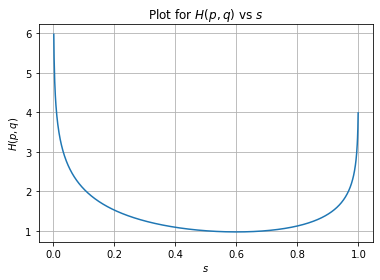

The value of r is set as: 0.600
The value of s obtained from the minimum of H(p, q): 0.600


In [9]:
# number of values for bernoulli variable 
n = 1000
X_gen = np.linspace(0, 1, n, endpoint=False) 
X_gen = np.delete(X_gen, 0)                 # for s values in (0, 1)
X_gen = X_gen.reshape(len(X_gen), 1)

# final array containing the bernoulli values
X_q = np.hstack((X_gen, 1-X_gen))

# bernoulli variable p ~ Bern(r)
r = 0.6
X_p = np.array([r, 1-r])

out = []
for i in range(len(X_gen)):
    out.append(cross_entropy(X_p, X_q[i]))

# plotting the graph H(p, q) vs s
plt.plot(X_gen, out)
plt.title('Plot for $H(p, q)$ vs $s$')
plt.grid(True)
plt.ylabel('$H(p, q)$')
plt.xlabel('$s$')
plt.show()

# obtaining the value of s where the H(p, q) attains it's minimum.
min_val_s = X_gen[np.argmin(out), 0]
print('The value of r is set as: %.3f' %r)
print('The value of s obtained from the minimum of H(p, q): %.3f' %min_val_s)

## Observation:
Minimising $H(p, q)$ gives us the value of $s$ which is same as the fixed value of $r$ at line 11 of the above code snippet. Hence, minimising $H(p, q)$ gives us identical PMFs for $p$ and $q$.

(b)

In [10]:
# takes in two input images in the form of numpy-ndarrays and outputs J(p, q)

def JS_divergence(X, Y):
    if X.shape == Y.shape:

        # formula for Jensen Shannon Divergence
        M = (X + Y)/2
        return relative_entropy(X, M) + relative_entropy(Y, M)
    else:
        raise Exception('The input arrays do not have the same shape.')

In [11]:
# KL-divergence between the histograms of the 2 stereoscopic images
print('D(left_hist || right_hist): %.6f' %relative_entropy(left_hist[1], right_hist[1]))
print('D(right_hist || left_hist): %.6f' %relative_entropy(right_hist[1], left_hist[1]))

# JS-divergence between the histograms of the 2 stereoscopic images
print('\n\nJ(left_hist , right_hist): %.6f' %JS_divergence(left_hist[1], right_hist[1]))
print('J(right_hist , left_hist): %.6f' %JS_divergence(right_hist[1], left_hist[1]))

D(left_hist || right_hist): 0.015104
D(right_hist || left_hist): 0.014410


J(left_hist , right_hist): 0.007346
J(right_hist , left_hist): 0.007346


# Observation:
From the above code cell it is verified that the JS-Divergence is symmetric indeed while KL-Divergence is not.

(c)

In [12]:
# using the joint histogram from the previous assignment
def joint_histogram(X, Y):
    if np.shape(X) == np.shape(Y):
        hist = np.array([[0]*256]*256, dtype=int)
        m, n = np.shape(X)
        
        # updating the histogram matrix taking the intensity values of correspoding pixels as the indices.
        for i in range (m):
            for j in range (n):
                    hist[X[i,j], Y[i,j]] += 1
        return hist/(m*n)
    else:
        raise Exception('The input images do not have the same dimensions.')

In [13]:
# getting the joint histogram from the 2 images

joint_hist = joint_histogram(left_img, right_img)

In [14]:
# checks if the given PDF belongs to all the possible bivariate joint PDFs of X and Y and also returns the obtained marginals

def pmf_check(PDF, X, Y):
    m, n = PDF.shape
    obtain_x = np.zeros(m)      # array to store the obtained marginal of x from the joint_histogram
    obtain_y = np.zeros(n)      # array to store the obtained marginal of y from the joint_histogram

    # computing marginals from the given joint histogram
    for i in range(m):
        obtain_x[i] = np.sum(PDF[i])
    for j in range(n):
        obtain_y[j] = np.sum(PDF[:, j])

    if (np.sum(np.abs(X - obtain_x)) <= 10e-15 and np.sum(np.abs(Y - obtain_y)) <= 10e-15):  
        # subtracting the obtained marginals from the actual ones and verifying if they are the same
        print('The Given PMF p(X, Y) belongs to Pi(r, s)') 
    else:
        print('The Given PMF p(X, Y) does not belong to Pi(r, s)')
    return obtain_x, obtain_y

In [15]:
# checking if the joint histogram belongs to the set of the possible bivariate joint PDFs of the histograms of the stereoscopic images.
# POSITIVE EXAMPLE

x, y = pmf_check(joint_hist, left_hist[1], right_hist[1])

The Given PMF p(X, Y) belongs to Pi(r, s)


In [16]:
# Now we create a random matrix

rand_joint_hist = np.random.randint(0, 256, (256, 256))
rand_joint_hist = rand_joint_hist/np.sum(rand_joint_hist)

# NEGATIVE EXAMPLE
# checking if the RANDOM joint histogram belongs to the set of the possible bivariate joint PDFs of the histograms of the stereoscopic images.

x_n, y_n = pmf_check(rand_joint_hist, left_hist[1], right_hist[1])

The Given PMF p(X, Y) does not belong to Pi(r, s)


# Q2

### (a)  
##### (i) What is the crowding problem? 
Ans: Crowding Problem is a problem that we face where we cannot preserve all the distances of a higher dimension while embedding the higher dimensional data in 2-Dimensions. This problem occurrs as the area of the 2-Dimensional map available to accomodate the moderately distant datapoints is not large enough compared to area availableto accomodate nearby datapoints. Hence, the smaller distances are not modelled accurately.   
   
##### (ii) How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem?   
Ans: Since the Student t-distribution approaches an inverse square law for the large pairwise distances when embedding in lower dimensions, the joint probabilities represented in the map become invariant to the changes in the scale of the map for far away points. Also, the large clusters of points behave in the same way as points really far away.   
    
##### (iii) What other important changes have been made in t-SNE relative to SNE?    
Ans: Due to the change in the cost function of t-SNE, the optimisation of the cost function of t-SNE is much easier compared to SNE. t-SNE also pulls back 2 clusters of similar points that get separated during the early optimisation.   

### (b)

In [21]:
# function to find the distance between 2 points of any dimension
def dist_sq (a, b):
    sum = 0
    for i in range(len(a)):
        sum += (a[i] - b[i])**2
    return sum

# function to find the denominator for finding Pi|j
def P_exc_dist_sq(X, i, sigma):
    n = len(X)
    fin_sum = 0
    for j in range(n):
        if j != i:
            fin_sum += np.exp(-dist_sq(X[i], X[j])/ (2*sigma[i]))
    return fin_sum

# function to find the denominator for finding Qij
def Q_exc_dist_sq(X):
    n = len(X)
    fin_sum = 0
    for i in range(n):
        for j in range(n):
            if j != i:
                fin_sum += (1/(1 + dist_sq(X[i], X[j])))
    return fin_sum

# defining KL-Divergence again to work better with 2D arrays
def KL_div(X, Y):
    m, n = X.shape
    rel_ent = 0
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    X /= sum_x
    Y /= sum_y

    # formula for relative entropy or KL-Divergence
    for i in range(m):
        for j in range(n):
            if Y[i, j] > 0 and Y[i, j] < 1 and X[i, j] > 0:
                rel_ent += (X[i, j]/sum_x) * np.log2((X[i, j]/sum_x)/(Y[i, j]/sum_y)) 
    return rel_ent


'''
function to perform t-Stochastic Neighbour Embedding

Takes in inputs:
. X - points in the higher dimensional space
. sigma - variance of the points of the higher dimensional space
. T - number of iteration to be performed
. eta - learning rate (co-eff of the gradient)
. alpha - momentum (assumed to be equal for all the iterations)
. dims - number of dimensions for the high dimensional data to be embedded in

Outputs
. KL-Divergence before and after the iterations
. Plots of the embedded points before and after the iterations

Returns
. None
'''

def tSNE (X, sigma, T, eta, alpha, dims):
    
    n = len(X)
    P = np.zeros((n, n))

    # calculating the pairwise affinities for the high-dimensional data
    for i in range(n):
        for j in range(n):
        
            P[j, i] = np.exp(-dist_sq(X[i], X[j])/ (2*sigma[i]))/P_exc_dist_sq(X, i, sigma)
    
    # making it symmetric 
    P = (P + P.T)/(2*n)
    for i in range(n):
        P[i, i] = 0

    # generating the embedded points randomly for the 1st iteration
    mean = np.zeros(dims)
    cov = np.identity(dims)
    Y = np.random.multivariate_normal(mean, 10e-4*cov, n)
    
    # plotting the embedded points in the given dimensions in the first iteration
    plt.title('Y at the beginning of 50 iterations for $\eta$ = %.2f' %eta + ', $\\alpha$ = %.2f' %alpha)
    plt.scatter(Y[:, 0], Y[:, 1], marker='o', ec='r', fc='None')
    plt.grid(True)
    plt.show()
    
    # keeping the Y(t-1) and Y(t-2) as Y for the start
    Y_t_1 = Y
    Y_t_2 = Y
    Q = np.zeros((n, n))
    
    # iterating
    for t in range(T):

        # computing the pairwise affinities for the embedded datapoints
        for i in range(n):
            for j in range(n):
                Q[i, j] = (1/(1 + dist_sq(Y[i], Y[j])))/(Q_exc_dist_sq(Y))
        
        
        if t==0:
            # KL-Divergence between P and Q at the start of 50 iterations
            print('D(P||Q) at the start:', KL_div(P, Q))
        
        gradient = np.zeros((n, dims))
        
        # computing the gradient
        for i in  range(n):
            grad = np.zeros(dims)
            for j in range(n):
                grad += (P[i, j] - Q[i, j])*(Y[i] - Y[j])*(1/(1 + dist_sq(Y[i], Y[j])))
        
            gradient[i] = 4*grad
        
        # updating the points
        Y = Y_t_1 + eta*gradient + alpha*(Y_t_1 - Y_t_2)

        # updating Y(t-1) and Y(t-2)
        Y_t_2 = Y_t_1
        Y_t_1 = Y
    
    # plotting the embedded datapoints at the end of 50 iterations
    plt.title('Y at the end of 50 iterations for $\eta$ = %.2f' %eta + ', $\\alpha$ = %.2f' %alpha)
    plt.scatter(Y[:, 0], Y[:, 1], marker='o', ec='r', fc="None")
    plt.grid(True)
    plt.show()
    # printing the KL-Divergence at the end of 50 iterations.
    print('D(P||Q) at the end:', KL_div(P, Q))

In [18]:
# setting the seed for np.random
random.seed(5)

# generating the high-dimensional datasets
cov = np.identity(10)
cov /= 10e-2
mean = np.ones(10)
gen1 = np.random.multivariate_normal(mean, cov, 10)
gen2 = np.random.multivariate_normal(10*mean, cov, 10)

X = np.vstack((gen1, gen2))

var_gen_1 = np.array([10]*10)
var_gen_2 = np.array([1]*10)
var_mat = np.hstack((var_gen_1, var_gen_2))

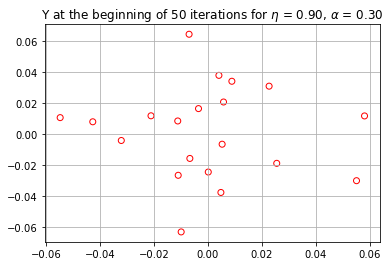

D(P||Q) at the start: 3.3987261886499662


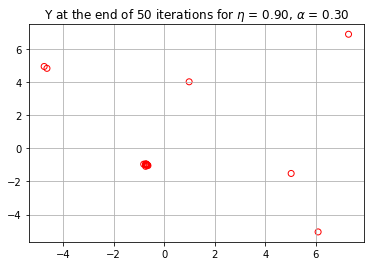

D(P||Q) at the end: 7.924014575916994


In [22]:
# t-SNE for learning rate = 0.9 and momentum = 0.3
tSNE(X, var_mat, 100, 0.9, 0.3, 2)

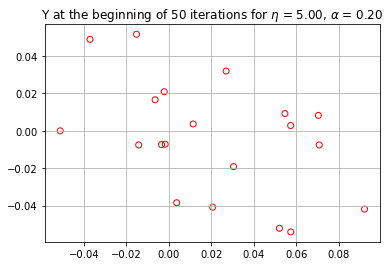

D(P||Q) at the start: 3.027562728302981


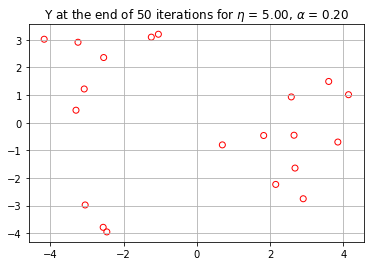

D(P||Q) at the end: 1.980765874235107


In [767]:
# t-SNE for learning rate = 5 and momentum = 0.2
tSNE(X, var_mat, 50, 5, 0.2, 2)

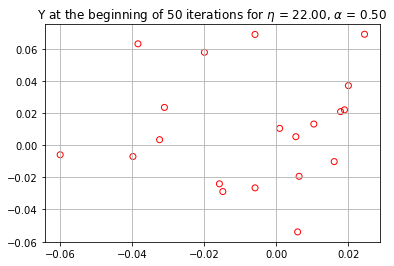

D(P||Q) at the start: 3.026115667144475


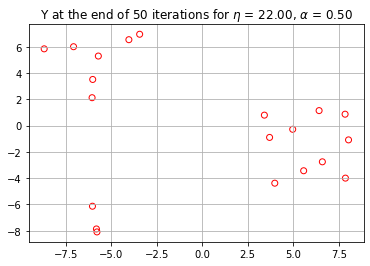

D(P||Q) at the end: 2.5532167718400705


In [768]:
# t-SNE for learning rate = 22 and momentum = 0.5
tSNE(X, var_mat, 50, 22, 0.5, 2)

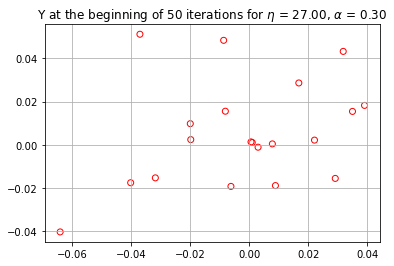

D(P||Q) at the start: 3.0274158054277707


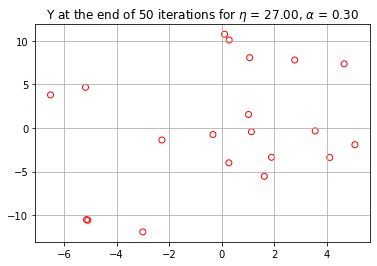

D(P||Q) at the end: 3.2073647277694906


In [769]:
# t-SNE for learning rate = 27 and momentum = 0.3
tSNE(X, var_mat, 50, 27, 0.3, 2)

## Observations:
1. The plots at the end of the 50 iterations compared to the start show clustering of points and the clusters move further apart from each other.
2. The KL-Divergence at the end of 50 iterations is less than that at the start. This shows that the points embedded in the lower dimensions are closer in showing the distances of the points in the higher dimensional space.

In [770]:
# implementing t-SNE from sklearn
from sklearn.manifold import TSNE

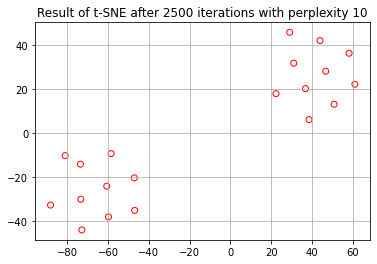

In [771]:
reduced = TSNE(n_components = 2 , n_iter = 2500, perplexity=10).fit_transform(X)
plt.scatter(reduced[:,0], reduced[:,1], marker='o', ec='r', fc='None')
plt.grid(True)
plt.title('Result of t-SNE after 2500 iterations with perplexity 10')
plt.show()

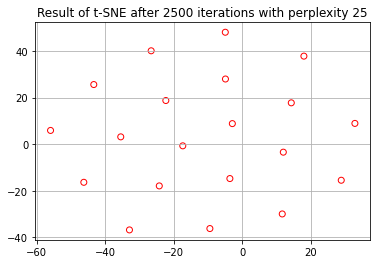

In [772]:
reduced = TSNE(n_components = 2 , n_iter = 2500, perplexity=25).fit_transform(X)
plt.scatter(reduced[:,0], reduced[:,1], marker='o', ec='r', fc='None')
plt.grid(True)
plt.title('Result of t-SNE after 2500 iterations with perplexity 25')
plt.show()

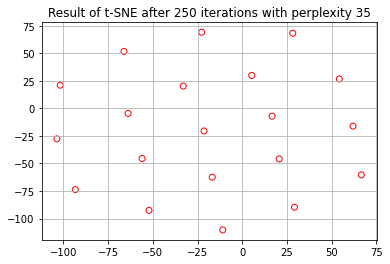

In [773]:
reduced = TSNE(n_components = 2 , n_iter = 2500, perplexity=35).fit_transform(X)
plt.scatter(reduced[:,0], reduced[:,1], marker='o', ec='r', fc='None')
plt.grid(True)
plt.title('Result of t-SNE after 250 iterations with perplexity 35')
plt.show()

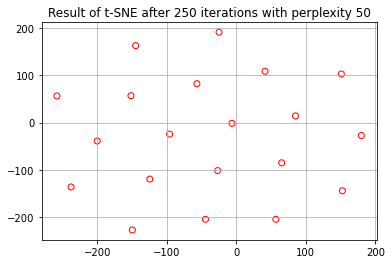

In [774]:
reduced = TSNE(n_components = 2 , n_iter = 2500, perplexity=50).fit_transform(X)
plt.scatter(reduced[:,0], reduced[:,1], marker='o', ec='r', fc='None')
plt.grid(True)
plt.title('Result of t-SNE after 250 iterations with perplexity 50')
plt.show()

### Observation:
As the perplexity increases the spread of the points decreases and the clusters become less dense.

# Q3

In [6]:
def flip_left_right(image):
    W, H, C = image.shape
    flipped_image = np.zeros((W, H, C), dtype=int)
    for i in range(H):
        flipped_image[:, H-i-1, :] = image[:, i, :]

    return flipped_image

def flip_up_down(image):
    W, H, C = image.shape
    flipped_image = np.zeros((W, H, C), dtype=int)
    for i in range(H):
        flipped_image[H-i-1, :, :] = image[i, :, :]

    return flipped_image

## (a)

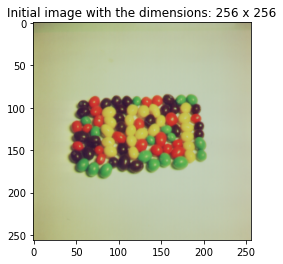

In [3]:
image = mpimg.imread('4.1.07.tiff')
plt.title('Initial image with the dimensions: %d'%image.shape[0] + ' x %d' %image.shape[1])
plt.imshow(image)
plt.show()

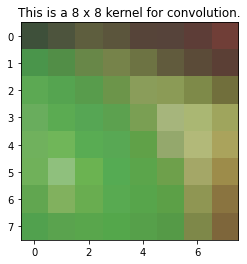

In [4]:
W, H, C = image.shape
K = 8
kernel_conv = np.zeros((K, K, C), dtype=int)

# taking a [8 X 8 X 3] part of the image as our kernel.
for i in range(0, K):
    for j in range(0, K):
        kernel_conv[i, j] = image[110 + i, 62 + j]
plt.title('This is a %d' %kernel_conv.shape[0] + ' x %d' %kernel_conv.shape[1] + ' kernel for convolution.')
plt.imshow(kernel_conv)
plt.show()

In [8]:
# takes in an image with dimensions W x H x C and convolves it with a kernel K x K x C 
# Gives J = I*h

def convolve (img, ker):
    W, H, C = img.shape
    K, K, C = ker.shape

    # flipping the kernel for convolution
    ker = flip_up_down(flip_left_right(ker))
    
    convolvedImage = np.zeros((W + K - 1, H + K - 1), dtype=int)

    paddedImage = np.zeros((W + 2*(K-1), H + 2*(K-1), C), dtype=int)
    for i in range(W):
        for j in range(H):
            paddedImage[(K-1)+i, (K-1)+j] = img[i, j]
    
    temp_ud = flip_up_down(img)
    for i in range(0, K-1):
        for j in range(K-1, H+K-1): 
            paddedImage[K-2-i, j] = temp_ud[W-i-1, j-(K-1)]         # top
            paddedImage[W+K-1+i, j] = temp_ud[(K-1)-i, j-(K-1)]     # bottom

    temp_lr = flip_left_right(img)
    for i in range(K-1, W+K-1):
        for j in range(0, K-1):
            paddedImage[i, K-2-j] = temp_lr[i-(K-1), H-j-1]         #left
            paddedImage[i, H+K-1+j] = temp_lr[i-(K-1), j]           #right
    

    # corners
    # numbering the corners 1, 2, 3, 4 in the clockwise manner starting from the top-left corner and picking up image parts for each corner
    corner1 = np.zeros((K-1, K-1, C), dtype=int)
    corner2 = np.zeros((K-1, K-1, C), dtype=int)
    corner3 = np.zeros((K-1, K-1, C), dtype=int)
    corner4 = np.zeros((K-1, K-1, C), dtype=int)
    
    # getting the corners from the image
    for i in range(0, K-1):
        for j in range(0, K-1):
            corner1[i, j] = img[i, j]
            corner2[i, j] = img[i, (H-(K-1))+j]
            corner3[i, j] = img[(W-(K-1))+i, (H-(K-1))+j]
            corner4[i, j] = img[(W-(K-1))+i, j]
    
    # mirroring the corners
    for i in range(C):
        corner2[:, :, i] = corner2[:, :, i].T
        corner3[:, :, i] = corner3[:, :, i].T

    J = np.zeros((K-1, K-1), dtype=int)
    for i in range(K-1):
        for j in range(K-1):
            if i + j + 1 == (K-1):
                J[i, j] = 1
    for i in range(C):
        corner1[:, :, i] = ((corner1[:, :, i]@J).T)@J
        corner4[:, :, i] = ((corner4[:, :, i]@J).T)@J

    # replacing the mirrored matrices in the corners
    for i in range(0, K-1):
        for j in range(0, K-1):
            paddedImage[i, j] = corner1[i, j]
            paddedImage[i, H+K-1+j] = corner2[i, j]
            paddedImage[W+K-1+i, H+K-1+j] = corner3[i, j]
            paddedImage[W+K-1+i, j] = corner4[i, j]
    plt.title('Padded image before the convolution')
    plt.imshow(paddedImage)
    plt.show()
    # applying convolution
    for i in range(W+K-1):
        for j in range(H+K-1):
            temp_img = paddedImage[i:(i+K), j:(j+K), :]
            for k in range(C):
                convolvedImage[i, j] += int(np.sum(ker[:, :, k]*temp_img[:, :, k]))
    convolvedImage = convolvedImage/np.max(convolvedImage)

    # extracting the same dimensional image from the convolved image
    final_image = np.zeros((W, H))
    final_image[:, :] = convolvedImage[int((K-1)/2):(W + int((K-1)/2)), int((K-1)/2):(H + int((K-1)/2))]
    
    plt.title('Final image with the dimensions: %d'%final_image.shape[0] + ' x %d' %final_image.shape[1])
    plt.imshow(final_image, cmap='gray')
    plt.show()

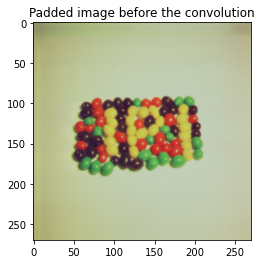

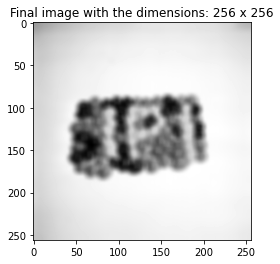

In [9]:
# applying convolution to the image
convolve(image, kernel_conv)

## (b)

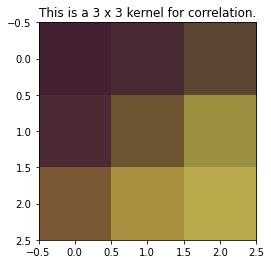

In [10]:
W, H, C = image.shape
K = 3
kernel_corr = np.zeros((K, K, C), dtype=int)

# taking a [8 X 8 X 3] part of the image as our kernel.
for i in range(0, K):
    for j in range(0, K):
        kernel_corr[i, j] = image[100 + i, 82 + j]
plt.title('This is a %d' %kernel_corr.shape[0] + ' x %d' %kernel_corr.shape[1] + ' kernel for correlation.')
plt.imshow(kernel_corr)
plt.show()

In [14]:
# takes in an image with dimensions W x H x C and correlates it with a kernel K x K x C 
# Gives J = corr(I,h)

def correlate (img, ker):
    W, H, C = img.shape
    K, K, C = ker.shape
    
    correlatedImage = np.zeros((W + K - 1, H + K - 1), dtype=int)

    paddedImage = np.zeros((W + 2*(K-1), H + 2*(K-1), C), dtype=int)
    for i in range(W):
        for j in range(H):
            paddedImage[(K-1)+i, (K-1)+j] = img[i, j]
    
    temp_ud = flip_up_down(img)
    for i in range(0, K-1):
        for j in range(K-1, H+K-1): 
            paddedImage[K-2-i, j] = temp_ud[W-i-1, j-(K-1)]         # top
            paddedImage[W+K-1+i, j] = temp_ud[(K-1)-i, j-(K-1)]     # bottom

    temp_lr = flip_left_right(img)
    for i in range(K-1, W+K-1):
        for j in range(0, K-1):
            paddedImage[i, K-2-j] = temp_lr[i-(K-1), H-j-1]         #left
            paddedImage[i, H+K-1+j] = temp_lr[i-(K-1), j]           #right
    
    # copying the corners and then inverting it along the diagonals or pseudo diagonals
    # corners
    # numbering the corners 1, 2, 3, 4 in the clockwise manner starting from the top-left corner and picking up image parts for each corner
    corner1 = np.zeros((K-1, K-1, C), dtype=int)
    corner2 = np.zeros((K-1, K-1, C), dtype=int)
    corner3 = np.zeros((K-1, K-1, C), dtype=int)
    corner4 = np.zeros((K-1, K-1, C), dtype=int)
    
    # getting the corners from the image
    for i in range(0, K-1):
        for j in range(0, K-1):
            corner1[i, j] = img[i, j]
            corner2[i, j] = img[i, (H-(K-1))+j]
            corner3[i, j] = img[(W-(K-1))+i, (H-(K-1))+j]
            corner4[i, j] = img[(W-(K-1))+i, j]
    
    # mirroring the corners
    for i in range(C):
        corner2[:, :, i] = corner2[:, :, i].T
        corner3[:, :, i] = corner3[:, :, i].T

    J = np.zeros((K-1, K-1), dtype=int)
    for i in range(K-1):
        for j in range(K-1):
            if i + j + 1 == (K-1):
                J[i, j] = 1
    for i in range(C):
        corner1[:, :, i] = ((corner1[:, :, i]@J).T)@J
        corner4[:, :, i] = ((corner4[:, :, i]@J).T)@J

    # replacing the mirrored matrices in the corners
    for i in range(0, K-1):
        for j in range(0, K-1):
            paddedImage[i, j] = corner1[i, j]
            paddedImage[i, H+K-1+j] = corner2[i, j]
            paddedImage[W+K-1+i, H+K-1+j] = corner3[i, j]
            paddedImage[W+K-1+i, j] = corner4[i, j]
    plt.title('Padded image before the correlation')
    plt.imshow(paddedImage)
    plt.show()
    # applying correlation
    for i in range(W+K-1):
        for j in range(H+K-1):
            temp_img = paddedImage[i:(i+K), j:(j+K), :]
            for k in range(C):
                correlatedImage[i, j] += int(np.sum(ker[:, :, k]*temp_img[:, :, k]))
    correlatedImage = correlatedImage/np.max(correlatedImage)

    # extracting the same dimensional image from the correlated image
    final_image = np.zeros((W, H))

    final_image[:, :] = correlatedImage[int((K-1)/2):(W + int((K-1)/2)), int((K-1)/2):(H + int((K-1)/2))]
    
    plt.title('Final image with the dimensions: %d'%final_image.shape[0] + ' x %d' %final_image.shape[1])
    plt.imshow(final_image, cmap='gray')
    plt.show()

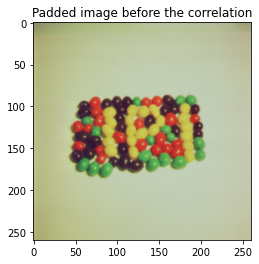

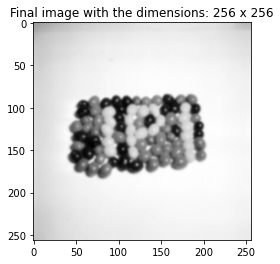

In [15]:
# applying correlation to the image

correlate(image, kernel_corr)